In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from scipy.optimize import least_squares
%matplotlib inline

In [54]:
#data organization and editing
def textFileParse(filename): #cuts out car maker (not going to evaluate) works
    data = []
    with open(filename) as text:
        tLines = text.readlines()
        for count, lineTxt in enumerate(tLines):
            term = lineTxt.split(maxsplit = 8)
            
            newLine = []
            if count == 0:
                for i in range(8):
                    newLine.append(float(term[i]))
                        
            else:
                for i in range(8):
                    newLine.append(float(term[i]))
            data.append(newLine)
                
        data = np.array(data, dtype = 'float64')

        return data
    
def splitYear(data, year): #works
    newData = []
    for i in range(398):
        dataRow = []
        if data[i,6] == year:
            for j in range(8):
                dataRow.append(data[i,j])
            newData.append(dataRow)
    newData = np.array(newData, dtype = 'float64')
    return newData

def splitCat(data,column):
    newData = data[:,column]
    return newData

def scaler(data): #potentially need to scale each column individually going to ask in class
    scalerX = StandardScaler()
    scalerY = StandardScaler()
    
    Ytest = np.zeros((len(data[:,0]),1))
    Ytest[:,0] = data[:,0]
    
    data[:,1:6] = scalerX.fit_transform(data[:,1:6])
    Ytest = scalerY.fit_transform(Ytest)
    data[:,0] = Ytest[:,0]
    return data

In [55]:
#PLSR
def func_PLSR(data): #needs the data to be scaled before hand (makes it easier to do cross validation)
    PLSR = PLSRegression(n_components = 2)
    PLSR.fit(data[:,1:6],data[:,0])
    print('The R2Y value is', PLSR.score(data[:,1:6],data[:,0]))
    Xscores = PLSR.x_scores_
    Yscores = PLSR.y_scores_
    Xload = PLSR.x_loadings_
    Yload = PLSR.y_loadings_
    plt.figure()
    plt.scatter(Xscores[:,0],Xscores[:,1])
    plt.scatter(Yscores[:,0],Yscores[:,1])
    plt.title('Scores Plot')
    plt.figure()
    plt.scatter(Xload[0,0],Xload[0,1],label = 'Cylinders')
    plt.scatter(Xload[1,0],Xload[1,1],label = 'Displacement')
    plt.scatter(Xload[2,0],Xload[2,1],label = 'Horsepower')
    plt.scatter(Xload[3,0],Xload[3,1],label = 'Weight')
    plt.scatter(Xload[4,0],Xload[4,1],label = 'Acceleration')
    plt.scatter(Yload[:,0],Yload[:,1], label = 'MPG')
    plt.title('Loadings Plot')
    plt.legend(loc = 'best');

In [56]:
#Least Squares
def residuals_ind(values,data,column):
    beta,offset = values
    predVal = []
    for i in range(len(x[:,0])):
        prediction = (beta*data[i,column]) + offset
        predVal.append(prediction)
    predVal = np.array(predVal)
    residuals = predVal - data[:,0]
    return residuals

def residuals_full(values,data):
    beta1,beta2,beta3,beta4,beta5,offset = values
    predVal = []
    for i in range(len(x[:,0])):
        prediction = (beta1*data[i,1]) + (beta2*data[i,2]) + (beta3*data[i,3]) + (beta4*data[i,4]) + (beta5*data[i,5]) + offset
        predVal.append(prediction)
    predVal = np.array(predVal)
    residuals = predVal - data[:,0]
    return residuals

def OLS_ind(data,column):
    y0 = [0,0]
    data = scaler(data)
    opt = least_squares(residuals_ind, y0, args = (data,column))
    return opt.x

def OLS_full(data):
    y0 = np.zeros(6)
    data = scaler(data)
    opt = least_squares(residuals_full,y0,args = (data,))
    return opt.x

In [57]:
#results analysis
def R2YCalc_ind(values,data,column):
    residuals = residuals_ind(values,data,column)
    for i in range(len(residuals)):
        residuals[i] = residuals[i]**2
    r2y = 1 - np.sum(residuals)
    return r2y

def R2YCalc_full(values,data):
    residuals = residuals_full(values,data)
    for i in range(len(residuals)):
        residuals[i] = residuals[i]**2
    r2y = 1 - np.sum(residuals)
    return r2y

In [58]:
#new function testing
def dataPlot_ind(values,data,column):
    plt.figure()
    plt.scatter(data[:,column],data[:,0])
    plt.title('Measured Data')
    
    beta,offset = values
    predVal = []
    for i in range(len(data[:,0])):
        prediction = (beta*data[i,column]) + offset
        predVal.append(prediction)
    predVal = np.array(predVal)
    
    plt.figure()
    plt.scatter(data[:,column],predVal)
    plt.title('Predicted Data')

In [59]:
x = textFileParse("auto-mpg.data.txt") #this function works

[-7.75396286e-01 -4.67868272e-10]
-157.70671902129047


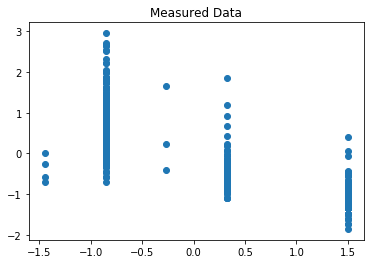

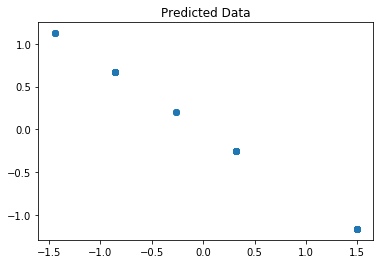

In [60]:
values = OLS_ind(x,1)
print(values)
value = R2YCalc_ind(values,x,1)
print(value)
dataPlot_ind(values,x,1)

[-8.04202825e-01  1.28237991e-16]
-139.59661099653727


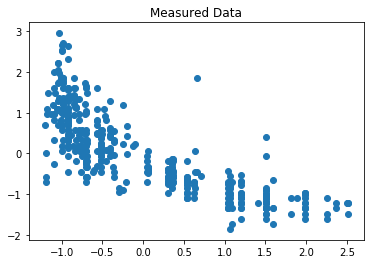

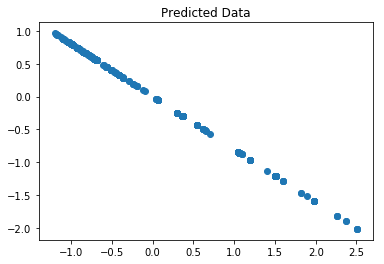

In [61]:
values = OLS_ind(x,2)
print(values)
value = R2YCalc_ind(values,x,2)
print(value)
dataPlot_ind(values,x,2)

[-7.78659413e-01  1.72299341e-10]
-155.6884282235696


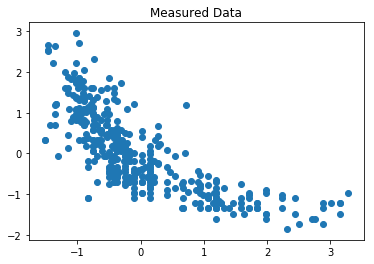

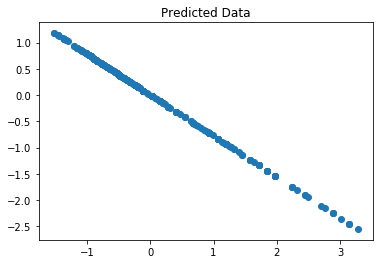

In [62]:
values = OLS_ind(x,3)
print(values)
value = R2YCalc_ind(values,x,3)
print(value)
dataPlot_ind(values,x,3)

[-8.31740933e-01 -8.80083506e-11]
-121.6663939464054


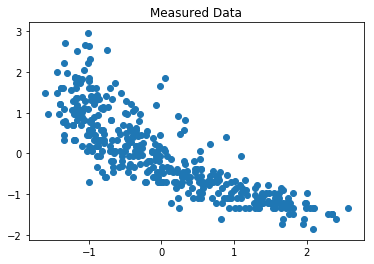

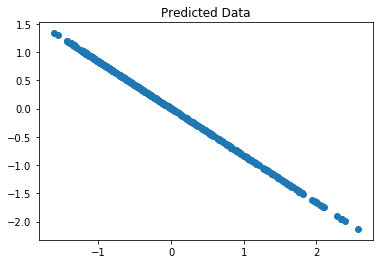

In [63]:
values = OLS_ind(x,4)
print(values)
value = R2YCalc_ind(values,x,4)
print(value)
dataPlot_ind(values,x,4)

The R2Y value is 0.6970374007227929


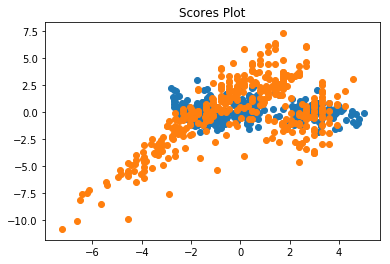

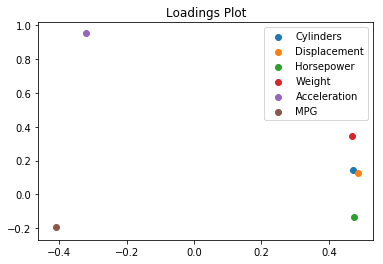

In [19]:
x = scaler(x)
func_PLSR(x)